<a href="https://colab.research.google.com/github/Soham101003/pytorch_turtorial_yt/blob/main/Building_a_CNN_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
 import torch
 import torch.nn as nn
 import torch.nn.functional as F
 from torch.utils.data import DataLoader
 from torchvision import datasets,transforms
 from torchvision.utils import make_grid

 import numpy as np
 import pandas as pd
 from sklearn.metrics import confusion_matrix
 import itertools
 import matplotlib.pyplot as plt



In [51]:
%matplotlib inline


In [54]:
#convert mnist dataset from 2d to 4d tensors
#no of images, height, width,colour

transform=transforms.ToTensor()

In [53]:
#training datda
train_data=datasets.  MNIST(root='/cnn_data',train=True,download=True,transform=transform)

In [55]:
#test data

test_data=datasets.MNIST(root='/cnn_data',train=False,download=True,transform=transform)

In [56]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [57]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [58]:
pwd

'/cnn_data'

In [59]:
cd ../

/


In [60]:
pwd

'/'

In [61]:
cd cnn_data

/cnn_data


In [62]:
ls

MNIST/


In [63]:
from re import T
#batch size for images

train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=True)

In [64]:
#define the CNN model
#describe the convolutional layer and what it is doing


conv1=nn.Conv2d(1,6,3,1)
conv2=nn.Conv2d(6,16,3,1)

In [65]:
#taking 1 data from the MNIST
for i,(X_train,y_train) in enumerate (train_data):
  break

In [66]:
X_train.shape

torch.Size([1, 28, 28])

In [67]:
#converting to 4d image

x=X_train.view(1,1, 28, 28)


#first convolution layer
x=F.relu(conv1(x))

#Pooling layer

x=F.max_pool2d(x,2,2)

#second convolutional layer
x=F.relu(conv2(x))

#second pooling layer

x=F.max_pool2d(x,2,2)

In [78]:
#Model
class ConvolutionalModule(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(1,6,3,1)
    self.conv2=nn.Conv2d(6,16,3,1)

    #fully connected layers
    self.fc1=nn.Linear(5*5*16,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)


    #forward function
    def forward(self,x):
     #first pass
      x=F.relu(self.conv1(x))
      x=F.max_pool2d(x,2,2)
      #second pass
      x=F.relu(conv2(x))
      x=F.max_pool2d(x,2,2)

      #review and flatten
      X=X.view(-1,16*5*5)

      #fully connected layers
      x=F.relu(self.fc1(x))
      x=F.relu(self.fc2(x))
      x=self.fc3(x)
      return F.log_softmax(x,dim=1)


In [79]:
#instance of our model
torch.manual_seed(41)
model=ConvolutionalModule()
model

ConvolutionalModule(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [80]:
#loss function optimizer

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [83]:


#convert mnist dataset from 2d to 4d tensors
#no of images, height, width,colour

transform=transforms.ToTensor()
#training datda
train_data=datasets.MNIST(root='/content/cnn_data',train=True,download=True,transform=transform) #Corrected root path
#test data

test_data=datasets.MNIST(root='/content/cnn_data',train=False,download=True,transform=transform) #Corrected root path
#train_data
#test_data
#pwd
#cd ../
#pwd
#cd cnn_data
#ls
#batch size for images

train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=True)
#define the CNN model
#describe the convolutional layer and what it is doing


conv1=nn.Conv2d(1,6,3,1)
conv2=nn.Conv2d(6,16,3,1)
#taking 1 data from the MNIST
for i,(X_train,y_train) in enumerate (train_data):
  break
X_train.shape
#converting to 4d image

x=X_train.view(1,1, 28, 28)


#first convolution layer
x=F.relu(conv1(x))

#Pooling layer

x=F.max_pool2d(x,2,2)

#second convolutional layer
x=F.relu(conv2(x))

#second pooling layer

x=F.max_pool2d(x,2,2)
#Model
class ConvolutionalModule(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(1,6,3,1)
    self.conv2=nn.Conv2d(6,16,3,1)

    #fully connected layers
    self.fc1=nn.Linear(5*5*16,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)


  #forward function
  def forward(self,x):
     #first pass
      x=F.relu(self.conv1(x))
      x=F.max_pool2d(x,2,2)
      #second pass
      x=F.relu(self.conv2(x))
      x=F.max_pool2d(x,2,2)

      #review and flatten
      x=x.view(-1,16*5*5) #Corrected variable name from X to x

      #fully connected layers
      x=F.relu(self.fc1(x))
      x=F.relu(self.fc2(x))
      x=self.fc3(x)
      return F.log_softmax(x,dim=1)

#instance of our model
torch.manual_seed(41)
model=ConvolutionalModule()
#model
#loss function optimizer

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]


Extracting /content/cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /content/cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 484kB/s]


Extracting /content/cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.43MB/s]


Extracting /content/cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.18MB/s]

Extracting /content/cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/cnn_data/MNIST/raw



In [85]:
# prompt: rewrite the code to train, test the cnn model with a time tracker for the epoch

import time

# ... (Your existing code for imports, data loading, and model definition)

# Training loop with time tracking
epochs = 3  # Example number of epochs
start_time = time.time()

for epoch in range(epochs):
    epoch_start_time = time.time()  # Start time for the current epoch
    for images, labels in train_loader:
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

    # Calculate and print epoch time
    epoch_end_time = time.time()
    epoch_time = epoch_end_time - epoch_start_time
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Time: {epoch_time:.2f} seconds")

# Calculate and print total training time
end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")


#Testing the model
correct=0
total=0
with torch.no_grad():
  for images, labels in test_loader:
    log_ps=model(images)
    ps=torch.exp(log_ps)
    top_p,top_class=ps.topk(1,dim=1)
    equals=top_class==labels.view(*top_class.shape)
    correct+=torch.sum(equals).item()
    total+=len(labels)

print(f"Accuracy of the model on {total} test images:{(correct/total)*100}%")

Epoch 1/3, Loss: 0.0004, Time: 29.37 seconds
Epoch 2/3, Loss: 0.0009, Time: 29.15 seconds
Epoch 3/3, Loss: 0.0001, Time: 29.75 seconds
Total training time: 88.26 seconds
Accuracy of the model on 10000 test images:98.64%


In [90]:
#grab an image

test_data[4143]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [91]:
#grab the data only

test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

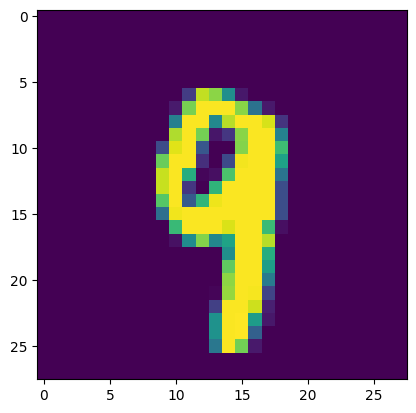

In [92]:
plt.imshow(test_data[4143][0].reshape(28,28))

In [94]:
#passing in image through the model

model.eval()
with torch.no_grad():
  new_prediction=model(test_data[4143][0].view(1,1,28,28))

In [97]:
new_prediction.argmax()

tensor(9)

In [98]:
test_data[200][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

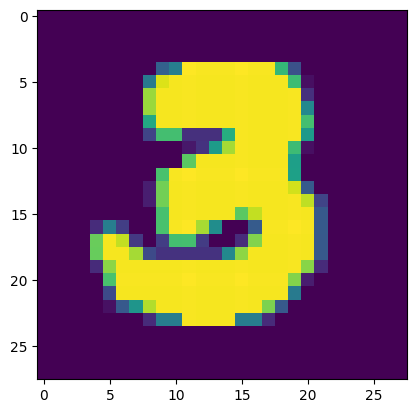

In [100]:
plt.imshow(test_data[200][0].reshape(28,28))




In [101]:
model.eval()
with torch.no_grad():
  new_prediction2=model(test_data[200][0].view(1,1,28,28))

In [104]:
new_prediction2.argmax()


tensor(3)